# Name heuristic

1948793 1161324 3110117
605574 468990 392491


/opt/conda/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


<IPython.core.display.Javascript object>


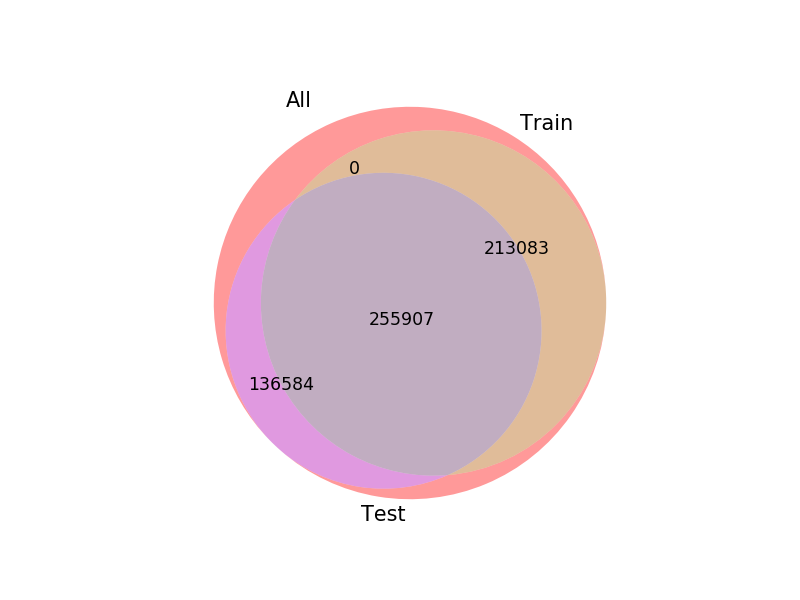

In [1]:
# !pip install editdistance
%matplotlib notebook
import editdistance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from sklearn.feature_extraction.text import CountVectorizer

train_df = pd.read_csv('../data/proc_train.csv')
pred_df = pd.read_csv('predictions/stack_v1_full.csv')

clean_names = []

# only non-nonsense queries
l1 = list(train_df[train_df.target.isin([0,1])].fullname_true)
# only "clean queries"
l2 = list(pred_df[pred_df.target==0].fullname_true)

clean_names.extend(l1)
clean_names.extend(l2)
print(len(l1),len(l2),len(clean_names))

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(clean_names)

vocab = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l1)

vocab_train = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l2)

vocab_test = cv.vocabulary_

print(len(vocab),len(vocab_train),len(vocab_test))

venn3([set(vocab.keys()),
       set(vocab_train.keys()),
       set(vocab_test.keys())], ('All', 'Train', 'Test'))

In [2]:
def count_new_words(text):
    global vocab
    new_words = 0
    words = text.split()
    
    for word in words:
        if word not in vocab:
            new_words += 1
            
    return new_words

pred_df['new_words'] = pred_df['fullname_true'].apply(lambda x: count_new_words(x))

In [3]:
cond = (pred_df.target==1)
pred_df[cond].new_words.value_counts()

0    1336744
1     193537
2      13899
3        829
4         11
5          1
Name: new_words, dtype: int64

In [4]:
cond = (pred_df.target==0)
pred_df[cond].new_words.value_counts()

0    1153927
1       6923
2        451
3         21
4          2
Name: new_words, dtype: int64

In [11]:
pred_df = pred_df.set_index('id')

In [12]:
vocab_list = list(vocab.keys())
cond = (pred_df.target==1)&(pred_df.new_words>0)
vocab_list_len = [len(_) for _ in vocab_list]
vocab_list_len = np.array(vocab_list_len)
vocab_arr = np.array(vocab_list)

In [15]:
ids = list(pred_df[cond].index.values)

In [17]:
from tqdm import tqdm

In [18]:
len(ids)

208277

'ЗЫРЯКОВ АЛЕКСАНДР КОНСТАНТИНОВИЧ'

In [36]:
from difflib import get_close_matches

In [37]:
get_close_matches('ЗЫРЯКОВ', vocab_list, n=1)


['ЗЫРЯНОВ', 'РЯКОВ', 'ЗЫРКО']

In [39]:
for _id in tqdm(ids, total=len(ids)):
    phrase = pred_df.loc[_id].fullname_true
    correct_phrase = correct_name_dist(phrase)
    pred_df.loc[_id,'fullname_true'] = correct_phrase




  0%|          | 0/208277 [00:00<?, ?it/s]


  0%|          | 1/208277 [00:00<19:26:51,  2.97it/s]


  0%|          | 2/208277 [00:00<19:28:54,  2.97it/s]


  0%|          | 3/208277 [00:01<19:29:16,  2.97it/s]


  0%|          | 4/208277 [00:01<20:13:50,  2.86it/s]


  0%|          | 5/208277 [00:01<20:26:27,  2.83it/s]


  0%|          | 6/208277 [00:02<20:21:18,  2.84it/s]


  0%|          | 7/208277 [00:02<20:15:22,  2.86it/s]


  0%|          | 8/208277 [00:02<20:04:12,  2.88it/s]


  0%|          | 9/208277 [00:03<19:56:49,  2.90it/s]


  0%|          | 10/208277 [00:03<19:49:53,  2.92it/s]


  0%|          | 11/208277 [00:03<19:44:13,  2.93it/s]


  0%|          | 12/208277 [00:04<19:40:00,  2.94it/s]


  0%|          | 13/208277 [00:04<19:36:53,  2.95it/s]


  0%|          | 14/208277 [00:04<19:33:23,  2.96it/s]


  0%|          | 15/208277 [00:05<19:30:29,  2.97it/s]


  0%|          | 16/208277 [00:05<19:28:47,  2.97it/s]


  0%|          | 17/208277 [00:05<19:27:22,  2.97

KeyboardInterrupt: 

In [28]:
!pip3 install textdistance

  Using cached https://files.pythonhosted.org/packages/e9/70/c7ce0b30bb25f16e1d884cd6da2b40eb444a4d0d4c1d94740a70f1cb2108/textdistance-3.0.3.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-plqjtxru/textdistance/setup.py", line 65, in <module>
        long_description=open('README.rst').read(),
      File "/opt/conda/lib/python3.6/encodings/ascii.py", line 26, in decode
        return codecs.ascii_decode(input, self.errors)[0]
    UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 4820: ordinal not in range(128)
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-plqjtxru/textdistance/
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
import textdistance

ModuleNotFoundError: No module named 'textdistance'

In [10]:
for 

'САЛИМОВ ХАМДУЛЛОЧОН СУНАТИЛЛОЕВИЧ'

In [38]:
def correct_name_dist(phrase,
                      len_diff=1):
    words = phrase.split()
    correct_phrase = []

    for word in words:
        if word not in vocab:
            similar_vocab = vocab_arr[(vocab_list_len>len(word)-len_diff-1)*(vocab_list_len<len(word)+len_diff+1)]
            distances = [editdistance.eval(name,word) for name in similar_vocab]
            idx = np.argsort(np.array(distances))[:5]
            correct_phrase.append(similar_vocab[idx[0]])
            # correct_phrase.append(get_close_matches(word, list(similar_vocab), n=1))
        else:
            correct_phrase.append(word)
    
    return ' '.join(correct_phrase)

# CLI script

In [1]:
import pickle
import numpy as np
import pandas as pd
import editdistance
from tqdm import tqdm
import matplotlib.pyplot as plt
from multiprocessing import Pool
from matplotlib_venn import venn3
from sklearn.feature_extraction.text import CountVectorizer

def pckl(obj,path):
    with open(path, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def upkl(path):
    with open(path, 'rb') as handle:
        _ = pickle.load(handle)
    return _

def list_multiprocessing(param_lst,
                         func,
                         **kwargs):
    
    workers = kwargs.pop('workers')

    with Pool(workers) as p:
        apply_lst = [([params], func, i, kwargs) for i,params in enumerate(param_lst)]
        result = list(tqdm(p.imap(_apply_lst, apply_lst), total=len(apply_lst)))

    # lists do not need such sorting, but this can be useful later
    result=sorted(result,key=lambda x:x[0])
    return [_[1] for _ in result]

def _apply_lst(args):
    params, func, num, kwargs = args
    return num, func(*params,**kwargs)

train_df = pd.read_csv('../data/proc_train.csv')
pred_df = pd.read_csv('predictions/stack_v1_full.csv')

clean_names = []

# only non-nonsense queries
l1 = list(train_df[train_df.target.isin([0,1])].fullname_true)
# only "clean queries"
l2 = list(pred_df[pred_df.target==0].fullname_true)

clean_names.extend(l1)
clean_names.extend(l2)
print(len(l1),len(l2),len(clean_names))

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(clean_names)

vocab = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l1)

vocab_train = cv.vocabulary_

cv = CountVectorizer(lowercase=False,
                     ngram_range=(1,1),
                     analyzer='word')
cv.fit(l2)

vocab_test = cv.vocabulary_

print(len(vocab),len(vocab_train),len(vocab_test))

def count_new_words(text):
    global vocab
    new_words = 0
    words = text.split()
    
    for word in words:
        if word not in vocab:
            new_words += 1
            
    return new_words

def correct_name_dist(phrase,
                      len_diff=1):
    global vocab_arr,vocab_list_len
    
    # print(phrase)
    words = phrase.split()
    correct_phrase = []

    for word in words:
        if word not in vocab:
            similar_vocab = vocab_arr[(vocab_list_len>len(word)-len_diff-1)*(vocab_list_len<len(word)+len_diff+1)]
            distances = [editdistance.eval(name,word) for name in similar_vocab]
            idx = np.argsort(np.array(distances))[:5]
            correct_phrase.append(similar_vocab[idx[0]])
            # correct_phrase.append(get_close_matches(word, list(similar_vocab), n=1))
        else:
            correct_phrase.append(word)
    
    # print(' '.join(correct_phrase))
    
    return ' '.join(correct_phrase)

pred_df['new_words'] = pred_df['fullname_true'].apply(lambda x: count_new_words(x))

pred_df = pred_df.set_index('id')
vocab_list = list(vocab.keys())
cond = (pred_df.target==1)&(pred_df.new_words>0)
vocab_list_len = [len(_) for _ in vocab_list]
vocab_list_len = np.array(vocab_list_len)
vocab_arr = np.array(vocab_list)

ids = list(pred_df[cond].index.values)
phrases = list(pred_df.loc[ids,'fullname_true'])

pckl(ids,'lev_ids_to_fix')
pckl(phrases,'lev_phrases_to_fix')

correct_phrases = list_multiprocessing(phrases,
                                       correct_name_dist,
                                       workers=8)

pckl(correct_phrases,'lev_corr_phrases_to_fix')

1948793 1161324 3110117
605574 468990 392491



  1%|          | 1052/208277 [01:41<5:32:14, 10.40it/s]


  1%|          | 1411/208277 [02:14<5:29:49, 10.45it/s]Process ForkPoolWorker-15:
Process ForkPoolWorker-14:
Process ForkPoolWorker-16:
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Process ForkPoolWorker-13:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/

  File "<ipython-input-21-280920e38cc6>", line 12, in correct_name_dist
    distances = [editdistance.eval(name,word) for name in similar_vocab]
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "<ipython-input-21-280920e38cc6>", line 12, in <listcomp>
    distances = [editdistance.eval(name,word) for name in similar_vocab]
  File "/opt/conda/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "<ipython-input-21-280920e38cc6>", line 12, in correct_name_dist
    distances = [editdistance.eval(name,word) for name in similar_vocab]
  File "<ipython-input-21-280920e38cc6>", line 12, in <listcomp>
    distances = [editdistance.eval(name,word) for name in similar_vocab]
  File "<ipython-input-21-280920e38cc6>", line 12, in <listcomp>
    distances = [editdistance.eval(name,word) for name in similar_vocab]
KeyboardInterrupt
  File "<ipython-input-1-0ec84864082f>", line 35, in _app

KeyboardInterrupt: 


  1%|          | 1411/208277 [02:25<5:56:24,  9.67it/s]

In [ ]:
for _id in tqdm(ids, total=len(ids)):
    phrase = pred_df.loc[_id].fullname_true
    correct_phrase = correct_name_dist(phrase)
    pred_df.loc[_id,'fullname_true'] = correct_phrase

# Check submissions

In [1]:
import pickle
import numpy as np
import pandas as pd
import editdistance
from tqdm import tqdm
import matplotlib.pyplot as plt
from multiprocessing import Pool
from matplotlib_venn import venn3
from sklearn.feature_extraction.text import CountVectorizer

def pckl(obj,path):
    with open(path, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def upkl(path):
    with open(path, 'rb') as handle:
        _ = pickle.load(handle)
    return _

pred_df = pd.read_csv('predictions/stack_v1_full.csv')

In [2]:
proc_ids = upkl('lev_ids_to_fix')
proc_phrases = upkl('lev_phrases_to_fix')
proc_fixed = upkl('lev_corr_phrases_to_fix')

In [3]:
import random

In [6]:
pred_df = pred_df.set_index('id')

In [45]:
pred_df[pred_df.fullname_true.str.match('ВЕЙСОВ')]

,target,fullname_true
id,,
808326,0,ВЕЙСОВ ЖАМОЛАДДИН КАДАМБОЕВИЧ
986188,0,ВЕЙСОВ ХУШМАМАД
1124933,1,ВЕЙСОВ ГАСАНАЛИ ИМАМАЛИ ОГЛЫ
1533054,0,ВЕЙСОВ СЕРГЕЙ ВАЛЕРЬЕВИЧ
1607551,0,ВЕЙСОВА ЖАЛА АНВЕР КЫЗЫ
1969699,1,ВЕЙСОВ ВЛАДИМИР ВЛАДИМИРОВИЧ
2063668,0,ВЕЙСОВА ОЛЬГА
2155087,1,ВЕЙСОВ ВЛАДИМИР ВЛАДИМИРОВИЧ
2187410,1,ВЕЙСОВ СЕРГЕЙ ВАЛЕРЬЕВИЧ


In [62]:
proc_phrases[-5:]

['КУЛИВИДЗЕ НИНО',
 'KOSHETOVA DILFUZA KURBANBAYEVNA',
 'NABIYEVA LOLOXON XASANXON QIZI',
 "RASHIDKHANOV NIZOMXON NABIVILLOXON O'G'LI",
 'ХАСАНОВ РУСТАМ ИШКОБИРОВИЧ']

In [63]:
pred_df.loc[proc_ids,'fullname_true'] = proc_fixed

In [59]:
id = random.sample(proc_ids,1)[0]
phrase = proc_phrases[proc_ids.index(id)]
fixed_phrase = proc_fixed[proc_ids.index(id)]
or_phrase = pred_df.loc[id].fullname_true
phrase,or_phrase,fixed_phrase

('МАММАДОВ АРЗУМ МАММЕДВЕЛИ ОГЛЫ',
 'МАММАДОВ АРЗУМ МАММЕДВЕЛИ ОГЛЫ',
 'МАММАДОВ АРЗУВ МАМЕДВЕЛИ ОГЛЫ')

In [68]:
pred_df.loc[(pred_df.target==0),'fullname_true'] = ''

In [69]:
pred_df.to_csv('predictions/stack1_lem.csv')

In [5]:
id

[2684503]